# Forecast Exploration Notebook
This notebooks on predicting future performance of the world economy and financial markets based on financial time sereis and the world events time series (generated by the NLP workstream).

## DeepAR

In [3]:
# pip install "gluonts[torch]"

In [68]:
# Importing the necessary packages 
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split

from gluonts.torch import DeepAREstimator

from gluonts.evaluation import Evaluator, backtest_metrics
from gluonts.evaluation import make_evaluation_predictions
from gluonts.model.evaluation import evaluate_model
from gluonts.evaluation.metrics import mape

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [69]:
# Load Stock-Indices TTS from a CSV file into a DataFrame
file_name = "indices.csv"
file_path = f"../../data_engineering/financial_ts/{file_name}"
tts_df = pd.read_csv(file_path)
# Format DataFrame
tts_col_map = {i:f"rts_f_{i}" for i in tts_df.columns if i.isnumeric()}
tts_df = tts_df.rename(columns={'Unnamed: 0': 'Week'})
tts_df['Week'] = tts_df['Week'].apply(lambda x: datetime.fromisoformat(x))
tts_df = tts_df.set_index('Week')
# Rename Columns
tts_col_map = {i:f"tts_{i}" for i in tts_df.columns}
tts_df = tts_df.rename(columns=tts_col_map)
tts_df.head()

,tts_NASDAQ,tts_S&P,tts_IT_ETF,tts_United_States_Oil_Fund(USO),tts_Farming_ETF,tts_MSCI_World,tts_Emerging_markets,tts_DAX
Week,,,,,,,,
1971-02-08,100.839996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-02-15,102.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-02-22,99.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-03-01,101.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-03-08,104.230003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Load Financial RTS from a CSV file into a DataFrame
file_name = "ww_gdp.csv"
file_path = f"../../data_engineering/financial_ts/{file_name}"
rts_f_df = pd.read_csv(file_path)
# Format DataFrame
# rts_f_col_map = {i:f"rts_f_{i}" for i in rts_f_df.columns if i.isnumeric()}
rts_f_df = rts_f_df.rename(columns={'Unnamed: 0': 'Week'})
rts_f_df['Week'] = rts_f_df['Week'].apply(lambda x: datetime.fromisoformat(x))
rts_f_df = rts_f_df.set_index('Week')
# Rename Columns
rts_f_col_map = {i:f"tts_{i}" for i in rts_f_df.columns}
rts_f_df = rts_f_df.rename(columns=rts_f_col_map)
rts_f_df.head()

,tts_Aruba,tts_Africa Eastern and Southern,tts_Afghanistan,tts_Africa Western and Central,tts_Angola,tts_Albania,tts_Andorra,tts_Arab World,tts_United Arab Emirates,tts_Argentina,...,tts_Virgin Islands (U.S.),tts_Vietnam,tts_Vanuatu,tts_World,tts_Samoa,tts_Kosovo,tts_Yemen,tts_South Africa,tts_Zambia,tts_Zimbabwe
Week,,,,,,,,,,,,,,,,,,,,,
1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Load Event RTS from a CSV file into a DataFrame
file_name = "ts_data_lda_model_topics_5_passes_10_on_title_lemmatized_cnbc_news_dataset_processed.csv"
file_path = f"../../data_engineering/timeseries_data/{file_name}"
rts_e_df = pd.read_csv(file_path)
# Format DataFrame
rts_e_col_map = {i:f"rts_e_{i}" for i in rts_e_df.columns if i.isnumeric()}
rts_e_df = rts_e_df.rename(
    columns=dict({'Unnamed: 0': 'Week'}, **rts_e_col_map)
)
rts_e_df['Week'] = rts_e_df['Week'].apply(lambda x: datetime.fromisoformat(x))
rts_e_df = rts_e_df.set_index('Week')
rts_e_df.index = rts_e_df.index.tz_localize(None)

rts_e_df.head()

,rts_e_0,rts_e_1,rts_e_2,rts_e_3,rts_e_4
Week,,,,,
2006-12-04,0.864812,0.033557,0.034168,0.033398,0.034065
2006-12-11,0.033342,0.866245,0.033369,0.033525,0.033519
2006-12-18,0.000000,0.000000,0.000000,0.000000,0.000000
2006-12-25,0.086091,0.084316,0.829804,0.084262,0.915527
2007-01-01,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
# Join TTS and RTS into a single DataFrame
ts_df = tts_df.join(rts_e_df).join(rts_f_df)
ts_df = ts_df.reset_index()
ts_df.head()

,Week,tts_NASDAQ,tts_S&P,tts_IT_ETF,tts_United_States_Oil_Fund(USO),tts_Farming_ETF,tts_MSCI_World,tts_Emerging_markets,tts_DAX,rts_e_0,...,tts_Virgin Islands (U.S.),tts_Vietnam,tts_Vanuatu,tts_World,tts_Samoa,tts_Kosovo,tts_Yemen,tts_South Africa,tts_Zambia,tts_Zimbabwe
0,1971-02-08,100.839996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.276266,NaN,NaN,NaN,4.278934,-0.08604,8.917587
1,1971-02-15,102.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.276266,NaN,NaN,NaN,4.278934,-0.08604,8.917587
2,1971-02-22,99.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.276266,NaN,NaN,NaN,4.278934,-0.08604,8.917587
3,1971-03-01,101.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.276266,NaN,NaN,NaN,4.278934,-0.08604,8.917587
4,1971-03-08,104.230003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.276266,NaN,NaN,NaN,4.278934,-0.08604,8.917587


In the following cell the pandas dataframe is converted into a [Dataset](https://ts.gluon.ai/stable/api/gluonts/gluonts.dataset.pandas.html) which gives the data additional explicid structure.

In [73]:
# Define Target and RTS columns
target_col = 'tts_MSCI_World'
past_rts_col = list(rts_e_col_map.values()) + list(rts_f_col_map.values())

In [74]:
# Target has to be a single value: https://ts.gluon.ai/stable/getting_started/models.html
dataset = PandasDataset(
    ts_df,
    target=target_col, #single value
    timestamp='Week',
    freq='W',
    past_feat_dynamic_real=past_rts_col #list
)

In [75]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-56)
test_data = test_gen.generate_instances(prediction_length=56, windows=1)

In [85]:
prediction_length=56
num_layers=2
hidden_size=40
max_epochs = 400

In [ ]:
# Train the model and make predictions
predictor = DeepAREstimator(
    prediction_length=prediction_length, 
    freq="W", 
    num_layers=num_layers, # Number of RNN layers (default: 2).
    hidden_size=hidden_size, # Number of RNN cells for each layer (default: 40).
    trainer_kwargs={"max_epochs": max_epochs}
).train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:72: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name  | Type        | Params | In sizes | Out sizes   
----------------------------------------------------------------
0 | model | DeepARModel | 23.8 K | ?        | [1, 100, 56]
----------------------------------------------------------------
23.8 K    Trainable params
0         Non-trainable params
23.8 K    Total params
0.095     Total estimated model params size (MB)


Epoch 0: : 50it [00:10,  4.96it/s, v_num=59, train_loss=1.000]

Epoch 0, global step 50: 'train_loss' reached 1.00298 (best 1.00298), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_59/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:09,  5.13it/s, v_num=59, train_loss=0.929]

Epoch 1, global step 100: 'train_loss' reached 0.92915 (best 0.92915), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_59/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:09,  5.18it/s, v_num=59, train_loss=1.010]

Epoch 2, global step 150: 'train_loss' was not in top 1


Epoch 3: : 50it [00:09,  5.03it/s, v_num=59, train_loss=0.806]

Epoch 3, global step 200: 'train_loss' reached 0.80602 (best 0.80602), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_59/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: : 50it [00:09,  5.14it/s, v_num=59, train_loss=0.901]

Epoch 4, global step 250: 'train_loss' was not in top 1


Epoch 5: : 50it [00:09,  5.02it/s, v_num=59, train_loss=0.807]

Epoch 5, global step 300: 'train_loss' was not in top 1


Epoch 6: : 50it [00:09,  5.07it/s, v_num=59, train_loss=0.858]

Epoch 6, global step 350: 'train_loss' was not in top 1


Epoch 7: : 50it [00:09,  5.11it/s, v_num=59, train_loss=0.817]

Epoch 7, global step 400: 'train_loss' was not in top 1


Epoch 8: : 50it [00:09,  5.20it/s, v_num=59, train_loss=0.913]

Epoch 8, global step 450: 'train_loss' was not in top 1


Epoch 9: : 50it [00:10,  4.95it/s, v_num=59, train_loss=0.769]

Epoch 9, global step 500: 'train_loss' reached 0.76867 (best 0.76867), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_59/checkpoints/epoch=9-step=500.ckpt' as top 1


Epoch 81: : 50it [00:10,  4.89it/s, v_num=59, train_loss=0.629]

Epoch 81, global step 4100: 'train_loss' was not in top 1


Epoch 82: : 50it [00:10,  4.91it/s, v_num=59, train_loss=0.658]

Epoch 82, global step 4150: 'train_loss' was not in top 1


Epoch 83: : 50it [00:09,  5.10it/s, v_num=59, train_loss=0.622]

Epoch 83, global step 4200: 'train_loss' was not in top 1


Epoch 84: : 50it [00:10,  4.76it/s, v_num=59, train_loss=0.660]

Epoch 84, global step 4250: 'train_loss' was not in top 1


Epoch 85: : 50it [00:09,  5.03it/s, v_num=59, train_loss=0.629]

Epoch 85, global step 4300: 'train_loss' was not in top 1


Epoch 86: : 50it [00:09,  5.19it/s, v_num=59, train_loss=0.648]

Epoch 86, global step 4350: 'train_loss' was not in top 1


Epoch 87: : 50it [00:10,  4.88it/s, v_num=59, train_loss=0.671]

Epoch 87, global step 4400: 'train_loss' was not in top 1


Epoch 88: : 50it [00:09,  5.13it/s, v_num=59, train_loss=0.663]

Epoch 88, global step 4450: 'train_loss' was not in top 1


Epoch 89: : 50it [00:09,  5.22it/s, v_num=59, train_loss=0.690]

Epoch 89, global step 4500: 'train_loss' was not in top 1


Epoch 90: : 50it [00:10,  4.87it/s, v_num=59, train_loss=0.659]

Epoch 90, global step 4550: 'train_loss' was not in top 1


Epoch 91: : 50it [00:09,  5.09it/s, v_num=59, train_loss=0.605]

Epoch 91, global step 4600: 'train_loss' was not in top 1


Epoch 92: : 50it [00:09,  5.11it/s, v_num=59, train_loss=0.555]

Epoch 92, global step 4650: 'train_loss' reached 0.55457 (best 0.55457), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_59/checkpoints/epoch=92-step=4650.ckpt' as top 1


Epoch 93: : 50it [00:10,  4.93it/s, v_num=59, train_loss=0.703]

Epoch 93, global step 4700: 'train_loss' was not in top 1


Epoch 94: : 50it [00:10,  4.90it/s, v_num=59, train_loss=0.615]

Epoch 94, global step 4750: 'train_loss' was not in top 1


Epoch 95: : 50it [00:10,  4.98it/s, v_num=59, train_loss=0.617]

Epoch 95, global step 4800: 'train_loss' was not in top 1


Epoch 96: : 50it [00:10,  4.98it/s, v_num=59, train_loss=0.642]

Epoch 96, global step 4850: 'train_loss' was not in top 1


Epoch 97: : 50it [00:09,  5.04it/s, v_num=59, train_loss=0.598]

Epoch 97, global step 4900: 'train_loss' was not in top 1


Epoch 98: : 50it [00:09,  5.09it/s, v_num=59, train_loss=0.587]

Epoch 98, global step 4950: 'train_loss' was not in top 1


Epoch 99: : 50it [00:10,  4.97it/s, v_num=59, train_loss=0.664]

Epoch 99, global step 5000: 'train_loss' was not in top 1


Epoch 384: : 50it [00:10,  4.97it/s, v_num=59, train_loss=0.625]

Epoch 384, global step 19250: 'train_loss' was not in top 1


Epoch 385: : 50it [00:09,  5.08it/s, v_num=59, train_loss=0.682]

Epoch 385, global step 19300: 'train_loss' was not in top 1


Epoch 386: : 50it [00:10,  4.97it/s, v_num=59, train_loss=0.666]

Epoch 386, global step 19350: 'train_loss' was not in top 1


Epoch 387: : 50it [00:10,  4.98it/s, v_num=59, train_loss=0.616]

Epoch 387, global step 19400: 'train_loss' was not in top 1


Epoch 388: : 50it [00:09,  5.07it/s, v_num=59, train_loss=0.663]

Epoch 388, global step 19450: 'train_loss' was not in top 1


Epoch 389: : 50it [00:10,  4.99it/s, v_num=59, train_loss=0.628]

Epoch 389, global step 19500: 'train_loss' was not in top 1


Epoch 390: : 50it [00:09,  5.04it/s, v_num=59, train_loss=0.692]

Epoch 390, global step 19550: 'train_loss' was not in top 1


Epoch 391: : 45it [00:09,  4.83it/s, v_num=59, train_loss=0.692]

In [ ]:
forecasts_it = list(predictor.predict(test_data.input))
# Plot predictions
plt.plot(tts_df[target_col]["2016":], color="black")
for forecast in forecasts_it:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
        dataset=test_data.dataset,
        predictor=predictor,
        num_samples=100,
)
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
for ts, forecast in zip(tss, forecasts):
    plt.plot(ts.to_timestamp())
    forecast.plot()

In [ ]:
# Does not work !
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])  # Define the quantiles for evaluation
agg_metrics, item_metrics = evaluator(tss, forecasts)

In [ ]:
agg_metrics

In [ ]:
experiment_config = Forecast_Experiment(
    model = 'torch_deepar',
    target = target_col,
    past_rts_col = str(past_rts_col),
    epochs = max_epochs,
    prediction_length = prediction_length,
    num_layers = num_layers,
    hidden_size = hidden_size,
    MASE = agg_metrics['MASE'],
    MAPE = agg_metrics['MAPE'],
    RMSE = agg_metrics['RMSE'],
    wQL_10 = agg_metrics['wQuantileLoss[0.1]'],
    wQL_50 = agg_metrics['wQuantileLoss[0.5]'],
    wQL_90 = agg_metrics['wQuantileLoss[0.9]'],
    avg_wQL = agg_metrics['mean_wQuantileLoss']
)
session.add(experiment_config)
session.commit()

## MXNET DeepAR

In [44]:
from gluonts.mx import DeepAREstimator as MXDeepAR, Trainer

In [46]:
mx_model = MXDeepAR(
    prediction_length=56, 
    freq="W",
    trainer=Trainer(epochs=10)
).train(training_data)

100%|██████████| 50/50 [00:15<00:00,  3.24it/s, epoch=10/10, avg_epoch_loss=0.866]


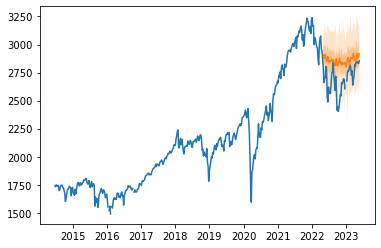

In [48]:
forecast_it, ts_it = make_evaluation_predictions(
        dataset=test_data.dataset,
        predictor=mx_model,
        num_samples=100,
)
forecasts = list(forecast_it)
tss = list(ts_it)

for ts, forecast in zip(tss, forecasts):
    plt.plot(ts.to_timestamp())
    forecast.plot()

## Config Setup

In [19]:
# !pip install sqlalchemy

In [61]:
from sqlalchemy import create_engine, Column, Integer, Float, String, ForeignKey, select
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship

In [62]:
Base = declarative_base()

class Forecast_Experiment(Base):
    __tablename__ = 'forecast_experiment'
    id = Column('id', Integer, primary_key=True)
    model = Column('model name', String(20))
    target = Column('target', String(100))
    past_rts_col = Column('past_rts_col', String(1000))
    epochs = Column('epochs', Integer)
    prediction_length = Column('prediction_length', Integer)
    num_layers = Column('num_layers', Integer)
    hidden_size = Column('hidden_size', Integer)
    MASE = Column('MASE', Float)
    MAPE = Column('MAPE', Float)
    RMSE = Column('RMSE', Float)
    wQL_10 = Column('wQL_01', Float)
    wQL_50 = Column('wQL_50', Float)
    wQL_90 = Column('wQL_90', Float)
    avg_wQL = Column('avg_wQL', Float)

<ipython-input-62-9eca5a238d76>:1: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [63]:
# engine = create_engine('sqlite:///:memory:', echo=True)
engine = create_engine("sqlite:///../config/forecast_config.db")

Base.metadata.create_all(bind=engine)
Session = sessionmaker(bind=engine)
session = Session()

In [ ]:
q1 = select(Forecast_Experiment)
q1_result = session.execute(q1) 
for s in q1_result.scalars():
    print(f"{s.model}: /n avg_wQL = {s.avg_wQL}")